In [16]:
import matplotlib.pyplot as mp
import os

import functions.data_functions as dat
from functions.plotting_functions import plot_TPA
import plot_config_file

In [17]:
# import config file dictionary
config = plot_config_file.config_params
config['file'] = r"2301_Json"
dir = os.path.join(config['root'], config['file'])
# interogate directory to extract folder and file names
folder_list, file_list = dat.dir_interogate(path=dir, extensions=config['extensions'], exceptions=config['exceptions'])
# create dictionary for indexing folders and files
fol_i = dat.make_index_dict(folder_list)
fil_i = [dat.make_index_dict(file_sub_list) for file_sub_list in file_list]
# make paths and extract data
data_path_list = dat.search_paths(folder_list, file_list, config['extensions'])
json_sets = [dat.read_json(os.path.join(dir, x)) for data_list in data_path_list for x in data_list]
# find the keys
json_keys = [key for key in json_sets[0]]
json_subkeys = [key for key in json_sets[0]['area']]
# 
data_values = [[json_set[key] for json_set in json_sets] for key in json_keys]

In [18]:
labels = ['HP_m5GHz', 'HP_m3GHz', 'HP_Res', 'LP_m5GHz', 'LP_m3GHz', 'LP_Res']

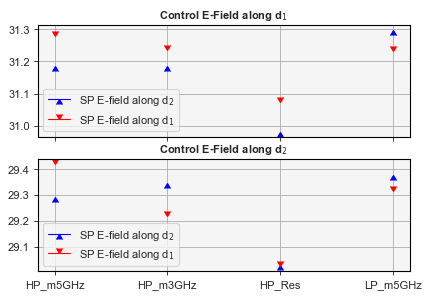

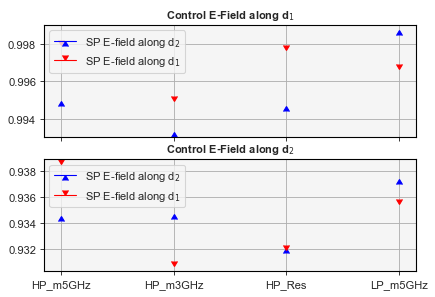

In [19]:
fig, ax = plot_TPA(data_values, json_subkeys, config['c_axis'], labels)

for title, figure in zip(json_keys, fig):
    name = os.path.join(dir, 'TPA_' + title + '.png')
    figure.savefig(fname=name, dpi=120, format='png', bbox_inches='tight')
